In [45]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
from tensorflow.keras.utils import image_dataset_from_directory


In [46]:
training_set = image_dataset_from_directory(
    'TRAIN',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4626 files belonging to 2 classes.


In [47]:
validation_set = image_dataset_from_directory(
    'validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 770 files belonging to 2 classes.


In [48]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [49]:
INPUT_SHAPE = (224, 224, 3)

In [50]:
mobnet = tf.keras.applications.MobileNetV3Large(
    input_shape=INPUT_SHAPE,
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
    # name="MobileNetV3Large",
)

In [51]:
model = tf.keras.models.Sequential()

In [52]:
model.add(tf.keras.Input(shape=INPUT_SHAPE))

In [53]:
model.add(mobnet)

In [54]:
model.add(tf.keras.layers.Dense(units = 2,activation='softmax'))

In [55]:
metrics_list = ['accuracy',
                tf.keras.metrics.F1Score()]

In [56]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=metrics_list
)

In [57]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)        │ (None, 1000)                │       5,507,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │           2,002 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,509,434 (21.02 MB)

 Trainable params: 5,485,034 (20.92 MB)

 Non-trainable params: 24,400 (95.31 KB)

In [58]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=15)

Epoch 1/15
145/145 ━━━━━━━━━━━━━━━━━━━━ 294s 2s/step - accuracy: 0.6909 - f1_score: 0.6755 - loss: 0.6793 - val_accuracy: 0.7701 - val_f1_score: 0.7664 - val_loss: 0.6520
Epoch 2/15
145/145 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.8420 - f1_score: 0.8420 - loss: 0.6365 - val_accuracy: 0.8221 - val_f1_score: 0.8220 - val_loss: 0.6328
Epoch 3/15
145/145 ━━━━━━━━━━━━━━━━━━━━ 231s 2s/step - accuracy: 0.8568 - f1_score: 0.8567 - loss: 0.6226 - val_accuracy: 0.7766 - val_f1_score: 0.7701 - val_loss: 0.6343
Epoch 4/15
145/145 ━━━━━━━━━━━━━━━━━━━━ 236s 2s/step - accuracy: 0.8916 - f1_score: 0.8915 - loss: 0.6047 - val_accuracy: 0.7662 - val_f1_score: 0.7562 - val_loss: 0.6315
Epoch 5/15
145/145 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.9089 - f1_score: 0.9089 - loss: 0.5898 - val_accuracy: 0.7961 - val_f1_score: 0.7913 - val_loss: 0.6151
Epoch 6/15
145/145 ━━━━━━━━━━━━━━━━━━━━ 229s 2s/step - accuracy: 0.9163 - f1_score: 0.9161 - loss: 0.5772 - val_accuracy: 0.8649 - val_f1_score: 

In [116]:
model.save("Trained_Model.h5")

In [117]:
model.save("Trained_Model.keras")

In [118]:
# Saving history
with open('Training_history.pkl', 'wb') as f:
    pickle.dump(training_history.history, f)

In [119]:
#Reloading History from pickle
with open('Training_history.pkl', 'rb') as f:
    load_history = pickle.load(f)
load_history

{'accuracy': [0.7643752694129944,
  0.8521400690078735,
  0.8722438216209412,
  0.8958063125610352,
  0.9092088341712952,
  0.9172070622444153,
  0.9193688035011292,
  0.9206658005714417,
  0.9262862205505371,
  0.9379593729972839,
  0.9429312348365784,
  0.947038471698761,
  0.9522265195846558,
  0.9476869702339172,
  0.9524427056312561],
 'f1_score': [<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.7554957 , 0.77263236], dtype=float32)>,
  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.8501314, 0.8540955], dtype=float32)>,
  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.8685205, 0.875762 ], dtype=float32)>,
  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.8963886 , 0.89521736], dtype=float32)>,
  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.9095607 , 0.90885407], dtype=float32)>,
  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.9171891, 0.9172249], dtype=float32)>,
  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.91928154, 0.91945577

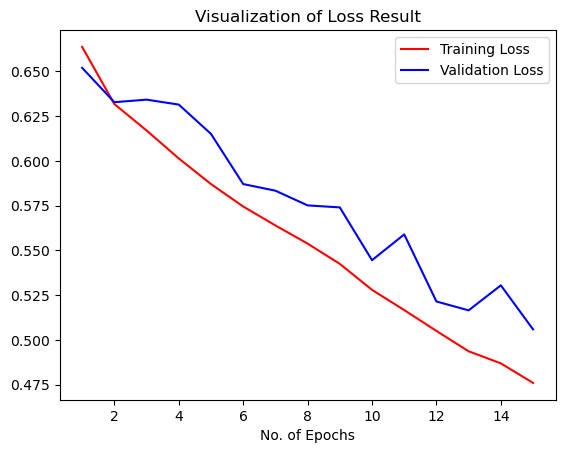

In [120]:
#Loss Visualization
epochs = [i for i in range(1,16)]
plt.plot(epochs,load_history['loss'],color='red',label='Training Loss')
plt.plot(epochs,load_history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Loss Result')
plt.legend()
plt.show()

In [121]:
test_set = validation_set = image_dataset_from_directory(
    'TEST',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 770 files belonging to 2 classes.


In [122]:
test_loss,test_acc,f1_score = model.evaluate(test_set)

13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 741ms/step - accuracy: 0.8719 - f1_score: 0.8706 - loss: 0.5176


In [123]:
test_loss

0.5257843136787415

In [124]:
test_acc

0.8545454740524292

In [125]:
f1_score

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.84357536, 0.8640776 ], dtype=float32)>

In [128]:
model = tf.keras.models.load_model("Trained_Model.keras")

In [129]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)        │ (None, 1000)                │       5,507,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │           2,002 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,994,470 (41.94 MB)

 Trainable params: 5,485,034 (20.92 MB)

 Non-trainable params: 24,400 (95.31 KB)

 Optimizer params: 5,485,036 (20.92 MB)

In [130]:
test_set = validation_set = image_dataset_from_directory(
    'TEST',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 770 files belonging to 2 classes.


In [131]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [132]:
Y_true

<tf.Tensor: shape=(770,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     

In [133]:
##Computing Predicted labels using test set
predicted_categories = model.predict(test_set)
Y_pred = tf.argmax(predicted_categories, axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 988ms/step


In [134]:
Y_true

<tf.Tensor: shape=(770,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     

In [135]:
Y_pred

<tf.Tensor: shape=(770,), dtype=int64, numpy=
array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     

In [136]:
from sklearn.metrics import classification_report
print(classification_report(Y_true,Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       385
           1       0.81      0.92      0.86       385

    accuracy                           0.85       770
   macro avg       0.86      0.85      0.85       770
weighted avg       0.86      0.85      0.85       770



In [137]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true,Y_pred)
cm

array([[302,  83],
       [ 29, 356]], dtype=int64)

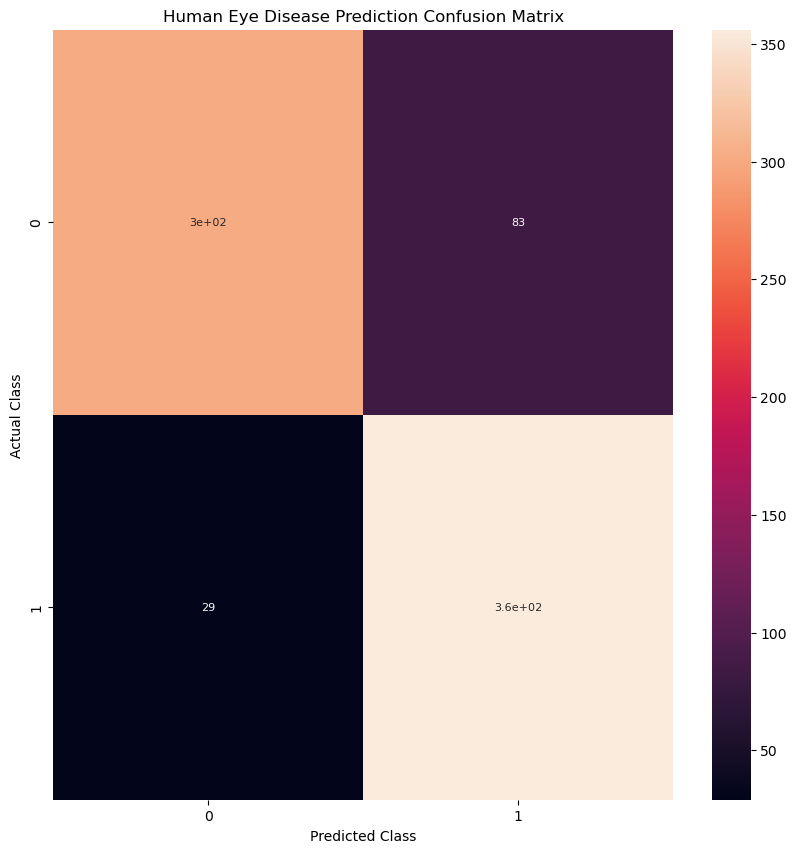

In [138]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,annot_kws={"size":8})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Human Eye Disease Prediction Confusion Matrix",fontsize=12)
plt.show()